In [5]:
# made by Gibeom LEE, HI LAB
# Ìïú Ìè¥Îçî ÎÇ¥ Î™®Îì† csv ÌååÏùºÏùò TENG VppÍ∞íÏùÑ Íµ¨Ìï† Îïå Ïú†Ïö©Ìï©ÎãàÎã§.
# +250806 Í∞Å frequencyÎèÑ Í∞ôÏù¥ Î≥¥Ïó¨Ï§çÎãàÎã§.

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [ ]:
# Ìè¥Îçî Í≤ΩÎ°ú
folder_path = r"C:\Users\GCU\OneDrive - gachon.ac.kr\HI Lab\0. Projects\0. On going\2. Aloe inspired DEG\0. Ïã§ÌóòÏûêÎ£å\4. Data measurement\250809_OTS-Hexadecane\minimized_csvÌååÏùº"

# ÏÇ¨Ïö©Ïûê ÏÑ§Ï†ïÍ∞í
prominence_ratio = 0.3 # Ïã†Ìò∏Ïùò ÌëúÏ§ÄÌé∏Ï∞®(std)Ïóê Í≥±Ìï¥ ÌîºÌÅ¨ prominence Í∏∞Ï§ÄÏùÑ ÏÑ§Ï†ï / Ï£ºÎ≥Ä Í∞íÎ≥¥Îã§ ÏñºÎßàÎÇò ÎèåÏ∂úÎêú Ï†ïÎèÑÏó¨Ïïº ÌîºÌÅ¨Î°ú Ïù∏ÏãùÌï†ÏßÄÎ•º Í≤∞Ï†ï
min_prominence = 0.1 # prominenceÏùò ÏµúÏÜüÍ∞í Ï†úÌïú / stdÍ∞Ä ÎÑàÎ¨¥ ÏûëÏïÑÏÑú prominenceÍ∞Ä ÎÑàÎ¨¥ ÎÇÆÍ≤å Í≥ÑÏÇ∞ÎêòÎäî Í≤ΩÏö∞Î•º Î∞©ÏßÄ
min_distance_sec = 0.07 #Ïù∏Ï†ëÌïú ÌîºÌÅ¨ Í∞Ñ ÏµúÏÜå ÏãúÍ∞Ñ Í∞ÑÍ≤© (Ï¥à Îã®ÏúÑ)
snr_threshold = 1 # Signal-to-Noise Ratio Í∏∞Ï§ÄÍ∞í / Í∞íÏù¥ ÎÜíÏùÑÏàòÎ°ù Í∞ïÌïú ÌîºÌÅ¨Îßå ÌÜµÍ≥º
min_relative_height = 0.05 # Ï†ÑÏ≤¥ ÏµúÎåÄ ÏßÑÌè≠Ïùò 5% Ïù¥ÏÉÅ 

Ref_FEP_DEG_Vpp: 126.37 V
Ref_FEP_DEG_Peak number: 72Í∞ú
Ref_FEP_DEG_ÌëúÏ§ÄÌé∏Ï∞®: 4.88
Ref_FEP_DEG_Ï£ºÌååÏàò: 7.30 Hz


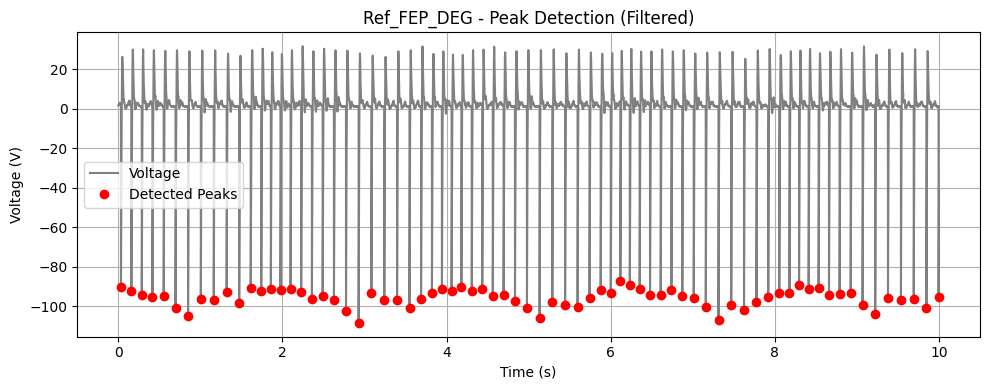

Ref_FEP_SEDEG_Vpp: 32.95 V
Ref_FEP_SEDEG_Peak number: 74Í∞ú
Ref_FEP_SEDEG_ÌëúÏ§ÄÌé∏Ï∞®: 1.42
Ref_FEP_SEDEG_Ï£ºÌååÏàò: 7.61 Hz


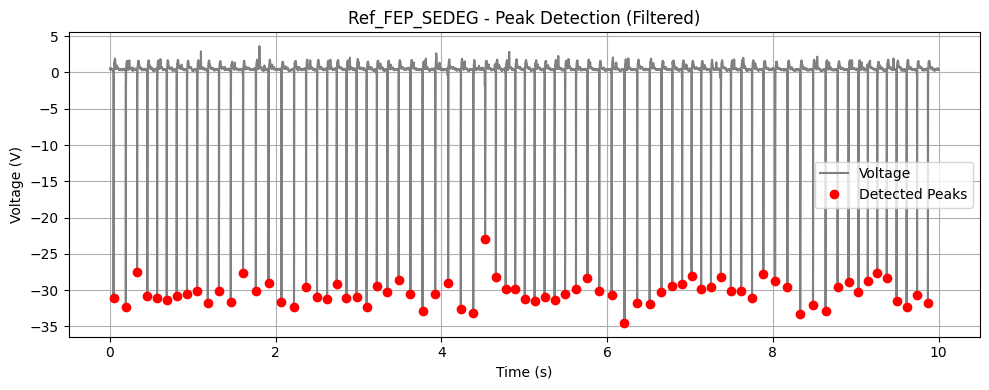

Ref_PDMS_Vpp: 7.05 V
Ref_PDMS_Peak number: 72Í∞ú
Ref_PDMS_ÌëúÏ§ÄÌé∏Ï∞®: 0.98
Ref_PDMS_Ï£ºÌååÏàò: 7.37 Hz


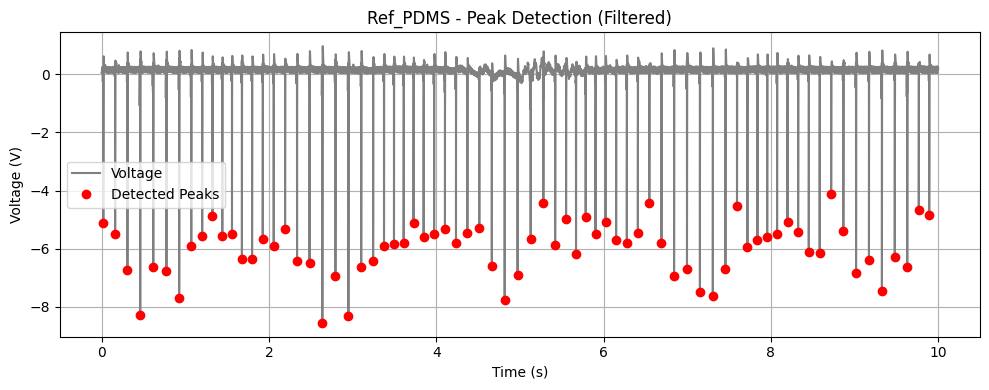


üìä Î™®Îì† ÌååÏùºÏùò ÌèâÍ∑† Vpp, ÌëúÏ§ÄÌé∏Ï∞®, ÌèâÍ∑† Ï£ºÌååÏàò Î™©Î°ù
Ref_FEP_DEG.csv_Vpp: 126.37 V | ÌëúÏ§ÄÌé∏Ï∞®: 4.88 V | Ï£ºÌååÏàò: 7.30 Hz
Ref_FEP_SEDEG.csv_Vpp: 32.95 V | ÌëúÏ§ÄÌé∏Ï∞®: 1.42 V | Ï£ºÌååÏàò: 7.61 Hz
Ref_PDMS.csv_Vpp: 7.05 V | ÌëúÏ§ÄÌé∏Ï∞®: 0.98 V | Ï£ºÌååÏàò: 7.37 Hz

üìà Ï†ÑÏ≤¥ ÌèâÍ∑† Vpp: 55.46 V
üìâ ÌëúÏ§ÄÌé∏Ï∞® (Vpp): 62.76 V
üéµ Ï†ÑÏ≤¥ ÌèâÍ∑† Ï£ºÌååÏàò: 7.43 Hz
üéØ ÌëúÏ§ÄÌé∏Ï∞® (Ï£ºÌååÏàò): 0.16 Hz


In [8]:
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
all_vpp_values = []
file_std_values = []
all_freq_values = []  ### Ï∂îÍ∞Ä: Ï£ºÌååÏàò Î¶¨Ïä§Ìä∏ Ï†ÄÏû•

# -------------------------------
# ÌååÏùºÎ≥Ñ Ï≤òÎ¶¨
for file_name in csv_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        # Îç∞Ïù¥ÌÑ∞ Î°úÎìú
        df = pd.read_csv(file_path)
        time = df.iloc[:, 0].values
        voltage = df.iloc[:, 1].values

        # ÏÉòÌîåÎßÅ ÏÜçÎèÑ
        total_time = time[-1] - time[0]
        sampling_rate = len(time) / total_time
        distance = int(sampling_rate * min_distance_sec)

        # ÌîºÌÅ¨ Í≤ÄÏ∂ú (ÏùåÏùò ÌîºÌÅ¨ ÎåÄÏÉÅÏúºÎ°ú)
        prom = max(np.std(voltage) * prominence_ratio, min_prominence)
        raw_peaks, properties = find_peaks(-voltage, prominence=prom, distance=distance)

        # ÌîºÌÅ¨ ÌïÑÌÑ∞ÎßÅ
        max_amplitude = np.max(-voltage)
        final_peaks = []
        for i in raw_peaks:
            left = max(0, i - int(0.05 * sampling_rate))
            right = min(len(voltage), i + int(0.05 * sampling_rate))
            local_noise = max(np.std(voltage[left:right]), 1e-6)
            signal = -voltage[i]
            if signal > max_amplitude * min_relative_height and signal / local_noise > snr_threshold:
                final_peaks.append(i)

        final_peaks = np.array(final_peaks, dtype=int)
        peak_times = time[final_peaks]

        # Vpp Í≥ÑÏÇ∞
        vpp_list = []
        for i in range(len(final_peaks) - 1):
            start = final_peaks[i]
            end = final_peaks[i + 1]
            vpp = np.max(voltage[start:end + 1]) - np.min(voltage[start:end + 1])
            vpp_list.append(vpp)

        mean_vpp = np.mean(vpp_list) if vpp_list else 0
        std = np.std(vpp_list, ddof=1) if vpp_list else 0

        # Ï£ºÌååÏàò Í≥ÑÏÇ∞
        if len(peak_times) < 2:
            mean_freq = 0
        else:
            periods = np.diff(peak_times)
            mean_freq = np.mean(1 / periods)

        # Í≤∞Í≥º Ï∂úÎ†•
        base_name = os.path.splitext(file_name)[0]
        print(f"{base_name}_Vpp: {mean_vpp:.2f} V")
        print(f"{base_name}_Peak number: {len(vpp_list):.0f}Í∞ú")
        print(f"{base_name}_ÌëúÏ§ÄÌé∏Ï∞®: {std:.2f}")
        print(f"{base_name}_Ï£ºÌååÏàò: {mean_freq:.2f} Hz")

        # Í≤∞Í≥º Ï†ÄÏû•
        all_vpp_values.append(mean_vpp)
        file_std_values.append(std)
        all_freq_values.append(mean_freq)  ### Ï∂îÍ∞Ä: Í∞Å ÌååÏùº ÌèâÍ∑† Ï£ºÌååÏàò Ï†ÄÏû•

        # -------------------------------
        # Í∑∏ÎûòÌîÑ Ï∂úÎ†•
        plt.figure(figsize=(10, 4))
        plt.plot(time, voltage, color='gray', label='Voltage')
        if len(final_peaks) > 0:
            plt.plot(time[final_peaks], voltage[final_peaks], 'ro', label='Detected Peaks')
        plt.title(f"{base_name} - Peak Detection (Filtered)")
        plt.xlabel("Time (s)")
        plt.ylabel("Voltage (V)")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"{file_name} Ï≤òÎ¶¨ Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")

# -------------------------------
# Ï†ÑÏ≤¥ ÏöîÏïΩ Ï∂úÎ†•
print("\n==============================")
print("üìä Î™®Îì† ÌååÏùºÏùò ÌèâÍ∑† Vpp, ÌëúÏ§ÄÌé∏Ï∞®, ÌèâÍ∑† Ï£ºÌååÏàò Î™©Î°ù")
for i in range(len(all_vpp_values)):
    print(f"{csv_files[i]}_Vpp: {all_vpp_values[i]:.2f} V | ÌëúÏ§ÄÌé∏Ï∞®: {file_std_values[i]:.2f} V | Ï£ºÌååÏàò: {all_freq_values[i]:.2f} Hz")

if all_vpp_values:
    overall_mean_vpp = np.mean(all_vpp_values)
    overall_std_vpp = np.std(all_vpp_values, ddof=1)
    overall_mean_freq = np.mean(all_freq_values) if all_freq_values else 0
    overall_std_freq = np.std(all_freq_values, ddof=1) if all_freq_values else 0

    print("\n==============================")
    print(f"üìà Ï†ÑÏ≤¥ ÌèâÍ∑† Vpp: {overall_mean_vpp:.2f} V")
    print(f"üìâ ÌëúÏ§ÄÌé∏Ï∞® (Vpp): {overall_std_vpp:.2f} V")
    print(f"üéµ Ï†ÑÏ≤¥ ÌèâÍ∑† Ï£ºÌååÏàò: {overall_mean_freq:.2f} Hz")
    print(f"üéØ ÌëúÏ§ÄÌé∏Ï∞® (Ï£ºÌååÏàò): {overall_std_freq:.2f} Hz")
else:
    print("üì≠ Vpp Îç∞Ïù¥ÌÑ∞Î•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")